# Task10 时序数据

## 1 知识梳理（重点记忆）

### 1.1 时序中的基本对象
| 概念 | 单元素类型 | 数组类型 | pandas数据类型|
|:---------|:----------|:-----------|:------------|
| Date times | `Timestamp` | `DatetimeIndex` | `datetime64[ns]` |
| Time deltas | `Timedelta` | `TimedeltaIndex` | `timedelta64[ns]` |
| Time spans | `Period` | `PeriodIndex` | `period[freq]` |
| Date offsets | `DateOffset` | `None` | `None` |

### 1.2 时间戳
- 单个时间戳的生成：`pd.Timestampe()`，使用`year`，`month`，`day`，`hour`，`min`，`second`获取各时间戳分量
- 时间戳对象转换：`pd.to_datatime()`，可使用`format`参数进行格式匹配
- 时间序列生成：`pd.date_range()`，其中`freq`参数可使用特殊标识，例如`10D`表示间隔10天
- `dt`对象有三类操作：  
 1. 取出时间相关的属性，`date`, `time`, `year`, `month`, `day`, `hour`, `minute`, `second`, `microsecond`, `nanosecond`, `dayofweek`, `dayofyear`, `weekofyear`, `daysinmonth`, `quarter`
 2. 判断时间戳是否满足条件，主要用于测试是否为月/季/年的第一天或者最后一天
 3. 取整操作，可使用`round`, `ceil`, `floor`等函数
- 时间戳切片：可利用`dt`对象和布尔条件联合使用，或可使用切片获得连续时间戳

### 1.3 时间差
- 时间差的生成：`pd.Timedelta()`，可使用`days`，`minutes`等参数
- 时间差序列转换：`pd.to_timedelta()`
- 时间差序列生成：`pd.timedelta_range()`
- `dt`对象属性：`days`, `seconds`, `mircroseconds`, `nanoseconds`
- Timedelta的运算：与标量的乘法运算、与时间戳的加减法运算、与时间差的加减法与除法运算

### 1.4 日期偏置
- offset对象：使用`pd.offsets`中的各类对象，例如`pd.offsets.WeekOfMonth(week=0, weekday=0)`
- 偏置字符串：
|标识|描述|
|:---:|:---:|
| MS | 月初 |
| M | 月末 |
| B | 工作日 |
| W-MON | 周一 |
| WOM-1MON | 每月第一个周一 |

### 1.5 时序中的滑窗与分组
- 滑动窗口：使用`series.rolling`函数，可指定`freq`时间窗口，例如`30D`表示30天
- 重采样：  
 1. 使用`series.resample`函数，该函数用法类似于分组对象`groupby`，后面可接`apply`函数
 2. 可传入特殊标识：`M`, `A`, `Q`, `BM`, `BA`, `BQ`, `W`这七个是取对应区间的最后一个时间戳

## 2 练一练

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2.1 第1题
`Timestamp`上定义了一个`value`属性，其返回的整数值代表了从1970年1月1日零点到给定时间戳相差的纳秒数，请利用这个属性构造一个随机生成给定日期区间内日期序列的函数。

**解答：**

In [2]:
ts = pd.Timestamp('2020/1/10')
ts.value

1578614400000000000

In [3]:
pd.Timestamp(ts.value)

Timestamp('2020-01-10 00:00:00')

In [4]:
import random
def generate_datetime_index(start, end, n):
    start = pd.Timestamp(start)
    end = pd.Timestamp(end)
    values = random.sample(range(start.value-1,end.value), n)
    return pd.to_datetime([pd.Timestamp(i) for i in sorted(values)])

In [5]:
generate_datetime_index('2020-1-1', '2020-2-28', n=10)

DatetimeIndex(['2020-01-02 18:21:18.229383398',
               '2020-01-10 02:30:33.050379716',
               '2020-01-12 23:16:27.553799453',
               '2020-01-21 04:47:39.629638921',
               '2020-01-24 02:34:54.384843009',
               '2020-01-24 15:16:39.222599821',
               '2020-01-28 07:50:01.032479864',
               '2020-01-31 01:37:22.579389020',
               '2020-02-27 13:22:59.079887345',
               '2020-02-27 15:04:18.570228381'],
              dtype='datetime64[ns]', freq=None)

### 2.2 第2题
前面提到了`datetime64[ns]`本质上可以理解为一个大整数，对于一个该类型的序列，可以使用`max, min, mean`，来取得最大时间戳、最小时间戳和“平均”时间戳。

In [6]:
res = generate_datetime_index('2020-1-1', '2020-2-28', n=10)
res

DatetimeIndex(['2020-01-01 19:23:11.610389290',
               '2020-01-08 12:27:29.051635767',
               '2020-01-08 21:11:41.512090804',
               '2020-01-17 11:34:45.125732225',
               '2020-01-24 03:43:19.780230916',
               '2020-01-25 00:53:58.001294033',
               '2020-01-27 06:49:45.234231413',
               '2020-01-29 16:07:31.764129239',
               '2020-02-01 19:49:13.512404765',
               '2020-02-19 14:10:04.633833107'],
              dtype='datetime64[ns]', freq=None)

In [7]:
res.max()

Timestamp('2020-02-19 14:10:04.633833107')

In [8]:
res.min()

Timestamp('2020-01-01 19:23:11.610389290')

In [9]:
res.mean()

Timestamp('2020-01-22 15:01:06.022597120')

## 3 练习

### 3.1 Ex1：太阳辐射数据集

现有一份关于太阳辐射的数据集：

In [10]:
df = pd.read_csv('../data/solar.csv', usecols=['Data','Time','Radiation','Temperature'])
df.head(3)

,Data,Time,Radiation,Temperature
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48


1. 将`Datetime, Time`合并为一个时间列`Datetime`，同时把它作为索引后排序。
2. 每条记录时间的间隔显然并不一致，请解决如下问题：
* 找出间隔时间的前三个最大值所对应的三组时间戳。
* 是否存在一个大致的范围，使得绝大多数的间隔时间都落在这个区间中？如果存在，请对此范围内的样本间隔秒数画出柱状图，设置`bins=50`。
3. 求如下指标对应的`Series`：
* 温度与辐射量的6小时滑动相关系数
* 以三点、九点、十五点、二十一点为分割，该观测所在时间区间的温度均值序列
* 每个观测6小时前的辐射量（一般而言不会恰好取到，此时取最近时间戳对应的辐射量）

**我的解答：**

**第1问：**

In [11]:
# 将9/29/2016 12:00:00 AM进行抽取
date_series = df.Data.str.extract('([/|\w]+\s).+')[0]
date_series.head()

0    9/29/2016 
1    9/29/2016 
2    9/29/2016 
3    9/29/2016 
4    9/29/2016 
Name: 0, dtype: object

In [12]:
df['Datetime'] = pd.to_datetime(date_series + df.Time)

In [13]:
# 删除Time列，设置Datetime为索引，并排序
df = df.drop(columns=['Time', 'Data']).set_index('Datetime').sort_index()

In [14]:
df.head(3)

,Radiation,Temperature
Datetime,,
2016-09-01 00:00:08,2.58,51
2016-09-01 00:05:10,2.83,51
2016-09-01 00:20:06,2.16,51


**第2问：**

In [15]:
# 计算间隔时间
timedelta_series = df.index.to_series().reset_index(drop=True) \
    .diff().dt.total_seconds()
timedelta_series.head()

0      NaN
1    302.0
2    896.0
3    299.0
4    304.0
Name: Datetime, dtype: float64

In [16]:
# 取前三个最大值的索引
index_largest3 = timedelta_series.nlargest(3).index

In [17]:
# 得到对应的时间戳
df.index[index_largest3.union(index_largest3 - 1)]

DatetimeIndex(['2016-09-29 23:55:26', '2016-10-01 00:00:19',
               '2016-11-29 19:05:02', '2016-12-01 00:00:02',
               '2016-12-05 20:45:53', '2016-12-08 11:10:42'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

In [18]:
# 获取绝大多数的间隔时间，在0.01到0.99之间都算绝大多数
res = timedelta_series.where(
    (timedelta_series < timedelta_series.quantile(0.99)) 
    & (timedelta_series >timedelta_series.quantile(0.01)))

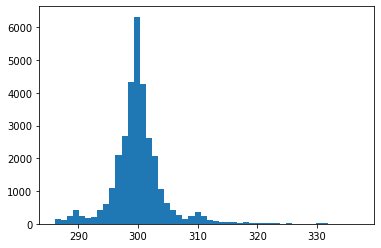

In [19]:
%matplotlib inline
_ = plt.hist(res, bins=50)

**第3问：**

In [20]:
# 温度与辐射量的6小时滑动相关系数
res = df.Radiation.rolling('6H').corr(df.Temperature)
res.tail()

Datetime
2016-12-31 23:35:02    0.416187
2016-12-31 23:40:01    0.416565
2016-12-31 23:45:04    0.328574
2016-12-31 23:50:03    0.261883
2016-12-31 23:55:01    0.262406
dtype: float64

In [21]:
# 以三点、九点、十五点、二十一点为分割，该观测所在时间区间的温度均值序列
# 即从3点开始，每个6小时
res = df.Temperature.resample('6H', origin='03:00:00').mean()
res.head()

Datetime
2016-08-31 21:00:00    51.218750
2016-09-01 03:00:00    50.033333
2016-09-01 09:00:00    59.379310
2016-09-01 15:00:00    57.984375
2016-09-01 21:00:00    51.393939
Freq: 6H, Name: Temperature, dtype: float64

In [22]:
# 每个观测6小时前的辐射量(取最近时间戳对应的辐射量)
# 获取6小时前的时间
datatime_before6H = df.index.shift(freq = '-6H')
datatime_before6H

DatetimeIndex(['2016-08-31 18:00:08', '2016-08-31 18:05:10',
               '2016-08-31 18:20:06', '2016-08-31 18:25:05',
               '2016-08-31 18:30:09', '2016-08-31 18:45:04',
               '2016-08-31 18:50:06', '2016-08-31 18:55:04',
               '2016-08-31 19:00:07', '2016-08-31 19:05:05',
               ...
               '2016-12-31 17:10:02', '2016-12-31 17:15:02',
               '2016-12-31 17:20:04', '2016-12-31 17:25:01',
               '2016-12-31 17:30:02', '2016-12-31 17:35:02',
               '2016-12-31 17:40:01', '2016-12-31 17:45:04',
               '2016-12-31 17:50:03', '2016-12-31 17:55:01'],
              dtype='datetime64[ns]', name='Datetime', length=32686, freq=None)

In [23]:
# 得到最近时间戳的索引号
index_int = [df.index.get_loc(i, method='nearest') for i in datatime_before6H]

In [24]:
# 通过索引号获取辐射量
df.Radiation[index_int]

Datetime
2016-09-01 00:00:08     2.58
2016-09-01 00:00:08     2.58
2016-09-01 00:00:08     2.58
2016-09-01 00:00:08     2.58
2016-09-01 00:00:08     2.58
                       ...  
2016-12-31 17:35:01    15.96
2016-12-31 17:40:06    11.98
2016-12-31 17:45:02     9.33
2016-12-31 17:50:01     8.49
2016-12-31 17:55:02     5.84
Name: Radiation, Length: 32686, dtype: float64

### 3.2 Ex2：水果销量数据集

现有一份2019年每日水果销量记录表：

In [25]:
df = pd.read_csv('../data/fruit.csv')
df.head(3)

,Date,Fruit,Sale
0,2019-04-18,Peach,15
1,2019-12-29,Peach,15
2,2019-06-05,Peach,19


1. 统计如下指标：
* 每月上半月（15号及之前）与下半月葡萄销量的比值
* 每月最后一天的生梨销量总和
* 每月最后一天工作日的生梨销量总和
* 每月最后五天的苹果销量均值
2. 按月计算周一至周日各品种水果的平均记录条数，行索引外层为水果名称，内层为月份，列索引为星期。
3. 按天计算向前10个工作日窗口的苹果销量均值序列，非工作日的值用上一个工作日的结果填充。


**我的解答：**

**第1问：**

In [26]:
df.Date = pd.to_datetime(df.Date)

In [27]:
# 所有的水果类型
df.Fruit.unique()

array(['Peach', 'Pear', 'Grape', 'Banana', 'Apple'], dtype=object)

In [28]:
# 获得葡萄的数据
df_grape = df[df.Fruit == 'Grape']

In [29]:
# 得到上半月葡萄的销量均值
res_first = df_grape[df_grape.Date.dt.day<=15].groupby(df_grape.Date.dt.month)['Sale'].sum()
# 得到下半月葡萄的销量均值
res_latter = df_grape[df_grape.Date.dt.day>15].groupby(df_grape.Date.dt.month)['Sale'].sum()

In [30]:
# 计算每月上半月（15号及之前）与下半月葡萄销量的比值
res = (res_first/res_latter).rename_axis('Month')
res

Month
1     1.174998
2     1.010499
3     0.776338
4     1.026345
5     0.900534
6     0.980136
7     1.350960
8     1.091584
9     1.116508
10    1.020784
11    1.275911
12    0.989662
Name: Sale, dtype: float64

In [31]:
# 每月最后一天的生梨销量总和
df[df.Date.dt.is_month_end].query("Fruit=='Pear'").groupby('Date')['Sale'].sum().rename_axis('Month')

Month
2019-01-31    847
2019-02-28    774
2019-03-31    761
2019-04-30    648
2019-05-31    616
2019-06-30    179
2019-07-31    757
2019-08-31    813
2019-09-30    858
2019-10-31    753
2019-11-30    859
Name: Sale, dtype: int64

In [32]:
# 每月最后一天工作日
date_time_bm = pd.date_range('20190101','20191231', freq='BM')
date_time_bm

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-29', '2019-04-30',
               '2019-05-31', '2019-06-28', '2019-07-31', '2019-08-30',
               '2019-09-30', '2019-10-31', '2019-11-29', '2019-12-31'],
              dtype='datetime64[ns]', freq='BM')

In [33]:
# 每月最后一天工作日的生梨销量总和
df[df.Date.isin(date_time_bm)].query("Fruit=='Pear'").groupby('Date')['Sale'].sum()

Date
2019-01-31     847
2019-02-28     774
2019-03-29     510
2019-04-30     648
2019-05-31     616
2019-06-28     605
2019-07-31     757
2019-08-30     502
2019-09-30     858
2019-10-31     753
2019-11-29    1193
Name: Sale, dtype: int64

In [34]:
# 每月最后五天
df_last_5days = df.groupby(df.Date.drop_duplicates().dt.month)['Date']
last_5days_datetime = df_last_5days.nlargest(5).reset_index(drop=True)
last_5days_datetime = pd.DatetimeIndex(last_5days_datetime)

In [35]:
# 苹果销量均值
res = df[df.Date.isin(last_5days_datetime)].query("Fruit=='Apple'")

In [36]:
res.groupby(res.Date.dt.month)['Sale'].mean().rename_axis('Month')

Month
1     65.313725
2     54.061538
3     59.325581
4     65.795455
5     57.465116
6     61.897436
7     57.000000
8     73.636364
9     62.301887
10    59.562500
11    64.437500
12    66.020000
Name: Sale, dtype: float64

**第2问：**

In [37]:
# 得到索引为水果名称，月份，星期的分类
month_order = ['January','February','March','April', 
               'May','June','July','August','September',
               'October','November','December']
month_category = df.Date.dt.month_name().astype('category') \
    .cat.reorder_categories(month_order, ordered=True)
month_category.head()

0       April
1    December
2        June
3     October
4        June
Name: Date, dtype: category
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

In [38]:
week_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sum']
week_dict = dict(zip(range(7), week_order))
week_dict

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sum'}

In [39]:
week_category = df.Date.dt.dayofweek.astype('category') \
    .cat.rename_categories(week_dict) \
    .cat.reorder_categories(week_order, ordered=True)

In [40]:
res = df.groupby([month_category, df.Fruit, week_category])['Sale'].count().to_frame()
res.head()

Sale
Date    Fruit Date      
January Apple Mon     46
              Tue     50
              Wed     50
              Thu     45
              Fri     32

In [41]:
# 调整索引：行索引外层为水果名称，内层为月份，列索引为星期
res = res.unstack(2).droplevel(0,axis=1)
res = res.swaplevel(0,1).rename_axis(index={'Date':'Month'})

In [42]:
res.sort_index()

Date              Mon  Tue  Wed  Thu  Fri  Sat  Sum
Fruit  Month                                       
Apple  January     46   50   50   45   32   42   23
       February    43   40   47   35   33   38   45
       March       43   44   37   31   52   42   42
       April       47   52   43   47   31   35   37
       May         43   46   39   58   46   55   31
       June        40   39   39   33   38   58   52
       July        41   50   58   52   37   40   34
       August      38   42   43   44   48   67   46
       September   59   40   35   36   34   45   49
       October     42   57   46   63   37   35   51
       November    39   47   47   37   46   53   37
       December    45   47   38   40   41   47   55
Banana January     27   29   24   42   36   24   35
       February    24   24   35   23   35   27   23
       March       29   19   18   22   32   37   31
       April       36   24   28   33   24   23   27
       May         20   23   35   26   34   32   31
       June        27   22   31   32   22   37   28
       July        26   33   23   24   28   29   14
       August      30   24   24   39   30   35   43
       September   30   17   34   24   23   31   34
       October     27   29   38   34   27   34   21
       November    19   26   20   22   30   32   27
       December    32   28   21   27   28   30   28
Grape  January     42   75   53   63   36   57   46
       February    53   39   42   46   62   44   47
       March       52   62   39   51   64   60   57
       April       61   71   34   49   51   54   49
       May         52   48   53   71   55   40   41
       June        42   53   56   58   46   60   59
       July        50   55   52   37   49   50   43
       August      41   42   53   72   72   45   62
       September   57   55   58   40   51   55   66
       October     66   63   73   62   42   47   48
       November    37   48   44   45   58   56   44
       December    59   38   50   36   47   44   63
Peach  January     67   78   73   88   59   49   72
       February    75   68   61   55   58   56   62
       March       61   56   69   49   78   73   81
       April       86   91   55   75   65   74   57
       May         60   64   84   77   71   80   74
       June        74   59   65   64   61   74   73
       July        64   51   90   63   50   65   64
       August      63   59   55   94   66   75   64
       September   82   60   61   60   79   64   72
       October     62   84   72   65   58   58   58
       November    54   59   66   63   64   86   57
       December    81   63   56   66   70   67   84
Pear   January     39   69   51   54   48   36   40
       February    44   42   49   46   55   35   54
       March       42   43   36   41   49   51   58
       April       57   48   47   36   45   47   39
       May         45   40   60   59   58   45   45
       June        28   45   46   40   43   62   45
       July        57   50   46   38   50   41   63
       August      45   47   31   63   43   50   44
       September   50   41   40   43   46   36   60
       October     48   48   67   58   51   40   44
       November    56   34   43   36   57   62   39
       December    45   52   41   33   52   40   52

**第3问：**按天计算向前10个工作日窗口的苹果销量均值序列，非工作日的值用上一个工作日的结果填充。

In [43]:
# 获取工作日的苹果销量数据
df_apple = df[(df.Fruit=='Apple')&(~df.Date.dt.dayofweek.isin([5,6]))]
s = df_apple.groupby('Date')['Sale'].sum()

In [44]:
# 得到2019年所有的日期
date_range_2019 = pd.date_range('20190101','20191231')
date_range_2019

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [45]:
# 按天计算向前10个工作日的均值，使用fillna进行填充
s.rolling('10D').mean().reindex(date_range_2019).fillna(method='ffill')

2019-01-01    189.000000
2019-01-02    335.500000
2019-01-03    520.333333
2019-01-04    527.750000
2019-01-05    527.750000
                 ...    
2019-12-27    626.875000
2019-12-28    626.875000
2019-12-29    626.875000
2019-12-30    710.166667
2019-12-31    710.166667
Freq: D, Name: Sale, Length: 365, dtype: float64